In [20]:
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os

sys.path.append('./utils/evolve_lzk/zcode/')
from zcode.constants import *
import zcode.math as zmath
import zcode.plot as zplot
import zcode.inout as zio

from utils import evolve_lzk

In [21]:
pwd

'/Users/michaelkatz/Documents/Research/Illustris/MCproject/paper/code'

In [22]:
np.seterr(divide='ignore', invalid='ignore');

mpl.rc('font', **{'family': 'serif', 'sans-serif': ['Times']})
mpl.rc('lines', solid_capstyle='round')
mpl.rc('mathtext', fontset='cm')
plt.rcParams.update({'grid.alpha': 0.5})

# Evolution

In [23]:
os.path.realpath(".")

'/Users/michaelkatz/Documents/Research/Illustris/MCproject/paper/code'

In [29]:
# PATH_INPUT_DATA = ("/Users/lzkelley/Research/working/arepo/illustris/redesign/mike_katz/illustris_LISA_paper/code/"
#                    "simulation_input_data.txt")
# PATH_INPUT_DATA = ("/Users/lzkelley/Research/working/arepo/illustris/redesign/mike_katz/illustris_LISA_paper/data/"
#                    "simulation_input_data.txt")
#                    "test_input_data.txt")
# cwd = os.path.realpath(os.path.curdir)
# print(cwd)
# print(os.listdir(cwd))
PATH_INPUT_DATA = os.path.realpath("./simulation_input_data_lzk.txt")
print(PATH_INPUT_DATA)
test = {'fname': './simulation_input_data_lzk.txt'}
evolver = evolve_lzk.EvolveLZK(**test, verbose=True)

/Users/michaelkatz/Documents/Research/Illustris/MCproject/paper/code/simulation_input_data_lzk.txt
input_data.shape = (17535,)
names = merger, snap_prev_in, snapshot_prev_out, snapshot_fin_out, subhalo_prev_in, subhalo_prev_out, subhalo_fin_out, id_old_prev_in, id_old_prev_out, id_old_fin_out, id_new_prev_in, id_new_prev_out, id_new_fin_out, mdot_sum, mass_new_prev_in, mass_new_prev_out, mass_new_fin_out, redshift, separation, coordinates_x, coordinates_y, coordinates_z, star_norm, star_gamma, gas_norm, gas_gamma, dm_norm, dm_gamma, vel_disp_prev_in, vel_disp_prev_out, vel_disp_fin_out, stellar_mass_prev_in, stellar_mass_prev_out, stellar_mass_fin_out, total_mass_prev_in, total_mass_prev_out, total_mass_fin_out
BAD  gas  7/17535 = 0.0003992015968063872
	resetting to 10.0%ile value: 3.1e-31
_dens_prof_norms.shape =  (3, 17535)
Mtot = (38.76, 39.86, 40.72, 42.02, 43.61), for (0%, 16%, 50%, 84%, 100%) (log values)
Mrat = (7.02e-06, 3.13e-03, 9.80e-02, 5.46e-01, 1.00e+00), for (0%, 16%, 50

/Users/michaelkatz/Documents/Research/Illustris/MCproject/paper/code/utils/evolve_lzk/evolveLZK.py:207: UserWarning: Using fixed velocity dispersion!
  warnings.warn("Using fixed velocity dispersion!")


In [25]:
evolver.calculate_timescale();

EvolveLZK.calculate_timescale()
Running `EvolveLZK.integrate()

Initializing 'Disk_Torque'
    Done after '0:00:00.000017'
Running 'Disk_Torque.dadt()'
DT T[9e-03 pc]/YR = (3.60e+01, 1.67e+06, 1.59e+07, nan, inf), for (0%, 16%, 50%, 84%, 100%)
    Done after '0:00:02.436589'

Initializing 'Dynamical_Friction'
    Done after '0:00:00.000014'
Running 'Dynamical_Friction.dadt()'
DF T[1e+03 pc]/YR = (1.37e-05, 1.94e+03, 5.15e+05, 3.26e+08, 8.64e+14), for (0%, 16%, 50%, 84%, 100%)
    Done after '0:00:01.160456'

Initializing 'Stellar_Scattering_Scalings'
    Done after '0:00:00.005042'
Running 'Stellar_Scattering_Scalings.dadt()'


/Users/michaelkatz/Documents/Research/Illustris/MCproject/paper/code/utils/evolve_lzk/stellar_scattering.py:183: UserWarning: Using SHM06 Scaling-Relations for LC Scattering
  warnings.warn("Using SHM06 Scaling-Relations for LC Scattering")


    Done after '0:00:00.187473'

Initializing 'Grav_Radiation'
    Done after '0:00:00.000011'
Running 'Grav_Radiation.dadt()'
(17535, 1) (17535, 1) (1, 200)
(1.47e+05, 2.61e+06, 2.22e+07, 5.01e+08, 2.05e+10), for (0%, 16%, 50%, 84%, 100%)
(1.42e+05, 2.91e+05, 1.21e+06, 6.59e+06, 4.09e+09), for (0%, 16%, 50%, 84%, 100%)
GW T[9e-03 pc]/YR = (2.02e+01, 2.91e+07, 1.86e+10, 2.64e+12, 2.94e+15), for (0%, 16%, 50%, 84%, 100%)
    Done after '0:00:00.040251'

All done after 0:00:03.850858
EvolveLZK.calculate_timescale()
Lifetimes: (1.01e-07, 1.81e-02, 7.02e-01, 1.26e+02, 4.90e+11), for (0%, 16%, 50%, 84%, 100%) [Gyr]
Coalescence redshifts: (0.00, 0.50, 1.71, nan, nan), for (0%, 16%, 50%, 84%, 100%)
	(valid) Coalescence redshifts: (2.89e-05, 3.61e-01, 1.01e+00, 2.10e+00, 6.78e+00), for (0%, 16%, 50%, 84%, 100%)
11751/17535 = 0.6701 coalesce before z=0


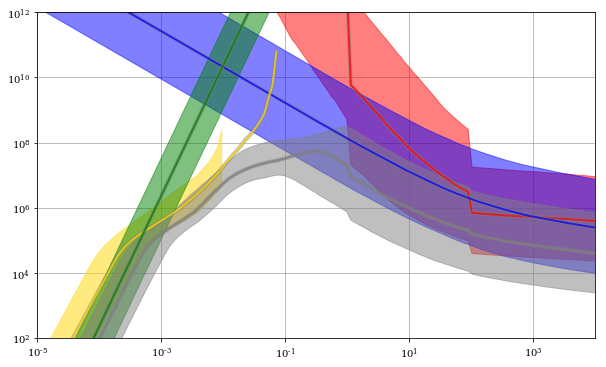

In [26]:
# evolver.dad

names = ['df', 'sc', 'cd', 'gw', None]
colors = ['red', 'blue', 'gold', 'green', '0.5']

fig, ax = plt.subplots(figsize=[10, 6])
ax.set(xscale='log', yscale='log')
zplot.set_grid(ax)

xx = evolver.rads
percs = 100 * sp.stats.norm.cdf([-0.5, 0.0, 0.5])

for ii, (nn, cc) in enumerate(zip(names, colors)):
    data = getattr(evolver, "dadt_" + nn) if (nn is not None) else evolver.dadt
    yy = np.percentile(-xx/data, percs, axis=0)/YR
    ax.plot(xx/PC, yy[1, :], color='0.5', lw=4.0, alpha=0.5)
    ax.plot(xx/PC, yy[1, :], color=cc, lw=2.0, alpha=0.75)
    ax.fill_between(xx/PC, yy[0, :], yy[-1, :], color=cc, edgecolor='none', alpha=0.5)
#     if nn == 'gw':
#         print(zmath.minmax(data))
#         print(yy[0, :])
#         print(yy[-1, :])
    
zplot.set_lim(ax, 'x', lo=1e-5, at='least')
zplot.set_lim(ax, 'x', hi=1e4, at='most')
zplot.set_lim(ax, 'y', lo=1e2, at='least')
zplot.set_lim(ax, 'y', hi=1e12, at='most')
plt.show()
    

(4.52e-03, 4.62e-01, 1.04e+00, 7.21e+00, 7.02e+02), for (0%, 16%, 50%, 84%, 100%)


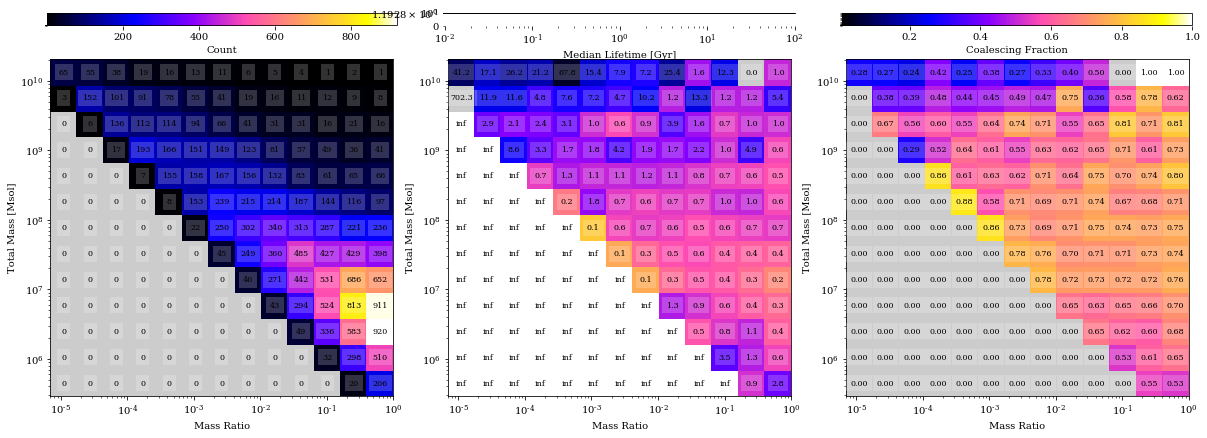

In [27]:
NBINS = 14

mrat = evolver.mrat
mtot = evolver.mtot
coal = evolver.inds_coal
durs = evolver.durs

bins_mrat = zmath.spacing(mrat, num=NBINS)
bins_mtot = zmath.spacing(mtot, num=NBINS)

hist, _, _, _ = sp.stats.binned_statistic_2d(
    mrat, mtot, durs, statistic='median', bins=[bins_mrat, bins_mtot])

count, _, _, _ = sp.stats.binned_statistic_2d(
    mrat, mtot, durs, statistic='count', bins=[bins_mrat, bins_mtot])

count_coal, _, _, _ = sp.stats.binned_statistic_2d(
    mrat[coal], mtot[coal], durs[coal], statistic='count', bins=[bins_mrat, bins_mtot])

hist /= GYR
bins_mtot /= MSOL
coal_frac = count_coal / count
# print(hist)
print(zmath.stats_str(hist[hist > 0.0]))

hist[count == 0] = np.inf
coal_frac[count == 0] = 0.0

smap_count = zplot.colormap([1, count.max()], scale='linear', cmap='gnuplot2')
smap_life = zplot.colormap([1e-2, 1e2], scale='log', cmap='gnuplot2_r')
smap_coal = zplot.colormap([0.01, 1.0], scale='linear', cmap='gnuplot2')

fig, axes = plt.subplots(figsize=[17, 6], ncols=3)
plt.subplots_adjust(left=0.05, bottom=0.08, top=0.86, right=0.98, wspace=0.16)
cbaxes = []
for ax in axes:
    bbox = zplot.extent(ax, invert=fig.transFigure)
    ax.set(xscale='log', yscale='log')
    cbax = fig.add_axes([bbox.x0, bbox.y1 + 0.07, bbox.width, 0.03])
    cbaxes.append(cbax)
    
cbkw = dict(cbar_kwargs=dict(orientation='horizontal'))
    
labels = ['Mass Ratio', 'Total Mass [Msol]', 'Count']
zplot.plot2DHist(axes[0], bins_mrat, bins_mtot, count, labels=labels,
                 smap=smap_count, overlay=count, overlay_fmt=".0f", cbax=cbaxes[0], **cbkw)

labels[2] = 'Median Lifetime [Gyr]'
zplot.plot2DHist(axes[1], bins_mrat, bins_mtot, hist, labels=labels,
                 smap=smap_life, overlay=hist, overlay_fmt=".1f", cbax=cbaxes[1], **cbkw)

labels[2] = 'Coalescing Fraction'
zplot.plot2DHist(axes[2], bins_mrat, bins_mtot, coal_frac, labels=labels,
                 smap=smap_coal, overlay=coal_frac, overlay_fmt=".2f", cbax=cbaxes[2], **cbkw)


fig.savefig("test.pdf", transparent=True)